<a href="https://colab.research.google.com/github/ucheokechukwu/courses/blob/main/Pytorch_For_Deep_Learning/08_pytorch_paper_replicating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rich -q
from rich import print, inspect, pretty
pretty.install()

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.

[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.

Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4036, done.
remote: Counting objects: 100% (1224/1224), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 4036 (delta 1067), reused 1080 (delta 995), pack-reused 2812
Receiving objects: 100% (4036/4036), 651.50 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (2360/2360), done.
Updating files: 100% (248/248), done.


# Get Data

In [3]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"



[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


# 2. Create Data and Dataloader

In [4]:
# Create image size (from Table 3 in the ViT paper)
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


(
    ['pizza', 'steak', 'sushi']
)

In [91]:
image_batch, label_batch = next(iter(train_dataloader))

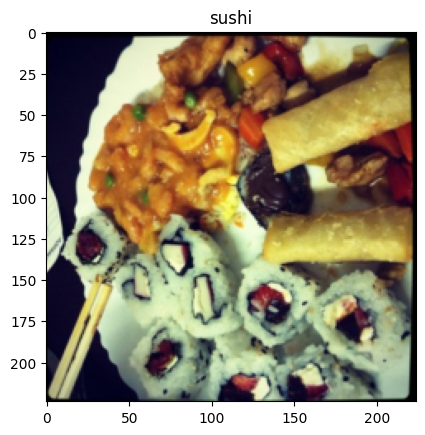

In [98]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random
idx = random.choice(range(32))
image = image_batch[idx]
label = class_names[label_batch[idx]]

imshow(image.permute(2,1,0))

plt.title(label)
plt.show()

# 3. Replicating VIT Overview

### Figure 1

Embeddding = learnable representation. Start with random numbers and approve them over time.

--2023-12-03 02:06:47--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-intputs-outputs-layers-and-blocks.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281972 (275K) [image/png]
Saving to: ‘08-vit-paper-intputs-outputs-layers-and-blocks.png’

08-vit-paper-intput 100%[===================>] 275.36K  --.-KB/s    in 0.02s   

2023-12-03 02:06:47 (12.9 MB/s) - ‘08-vit-paper-intputs-outputs-layers-and-blocks.png’ saved [281972/281972]



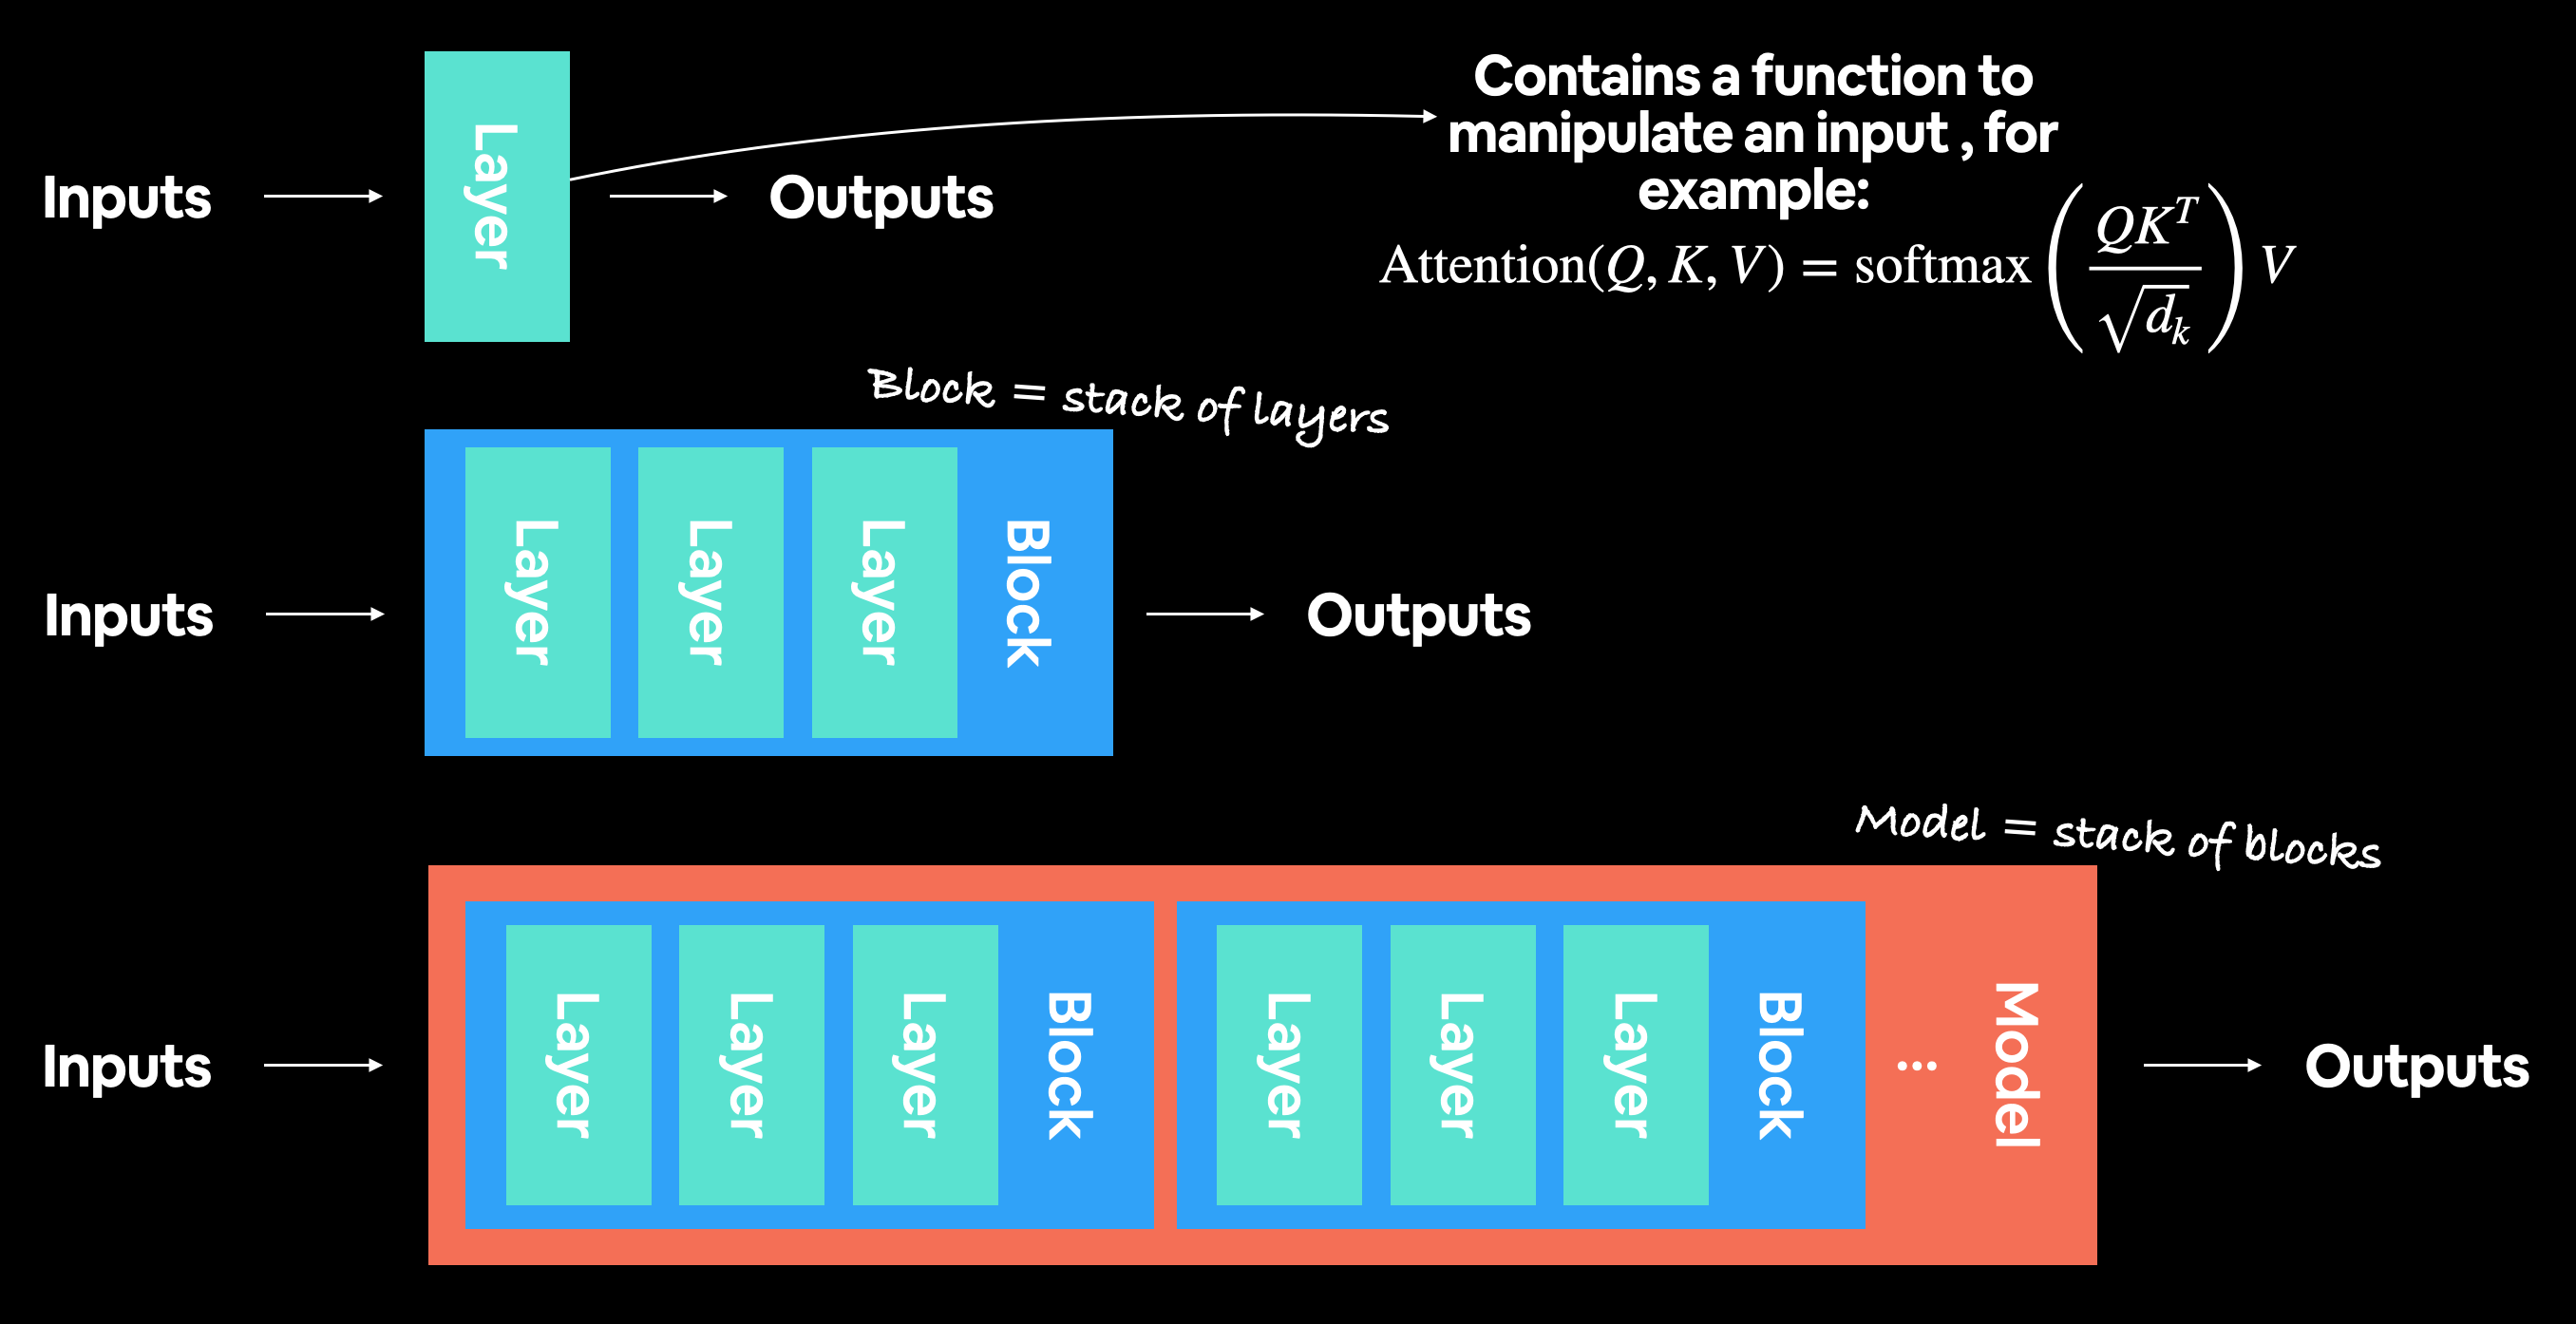

In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-intputs-outputs-layers-and-blocks.png

import IPython
IPython.display.Image("08-vit-paper-intputs-outputs-layers-and-blocks.png")

--2023-12-03 02:06:47--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804489 (786K) [image/png]
Saving to: ‘08-vit-paper-figure-1-inputs-and-outputs.png’

08-vit-paper-figure 100%[===================>] 785.63K  --.-KB/s    in 0.04s   

2023-12-03 02:06:47 (20.9 MB/s) - ‘08-vit-paper-figure-1-inputs-and-outputs.png’ saved [804489/804489]



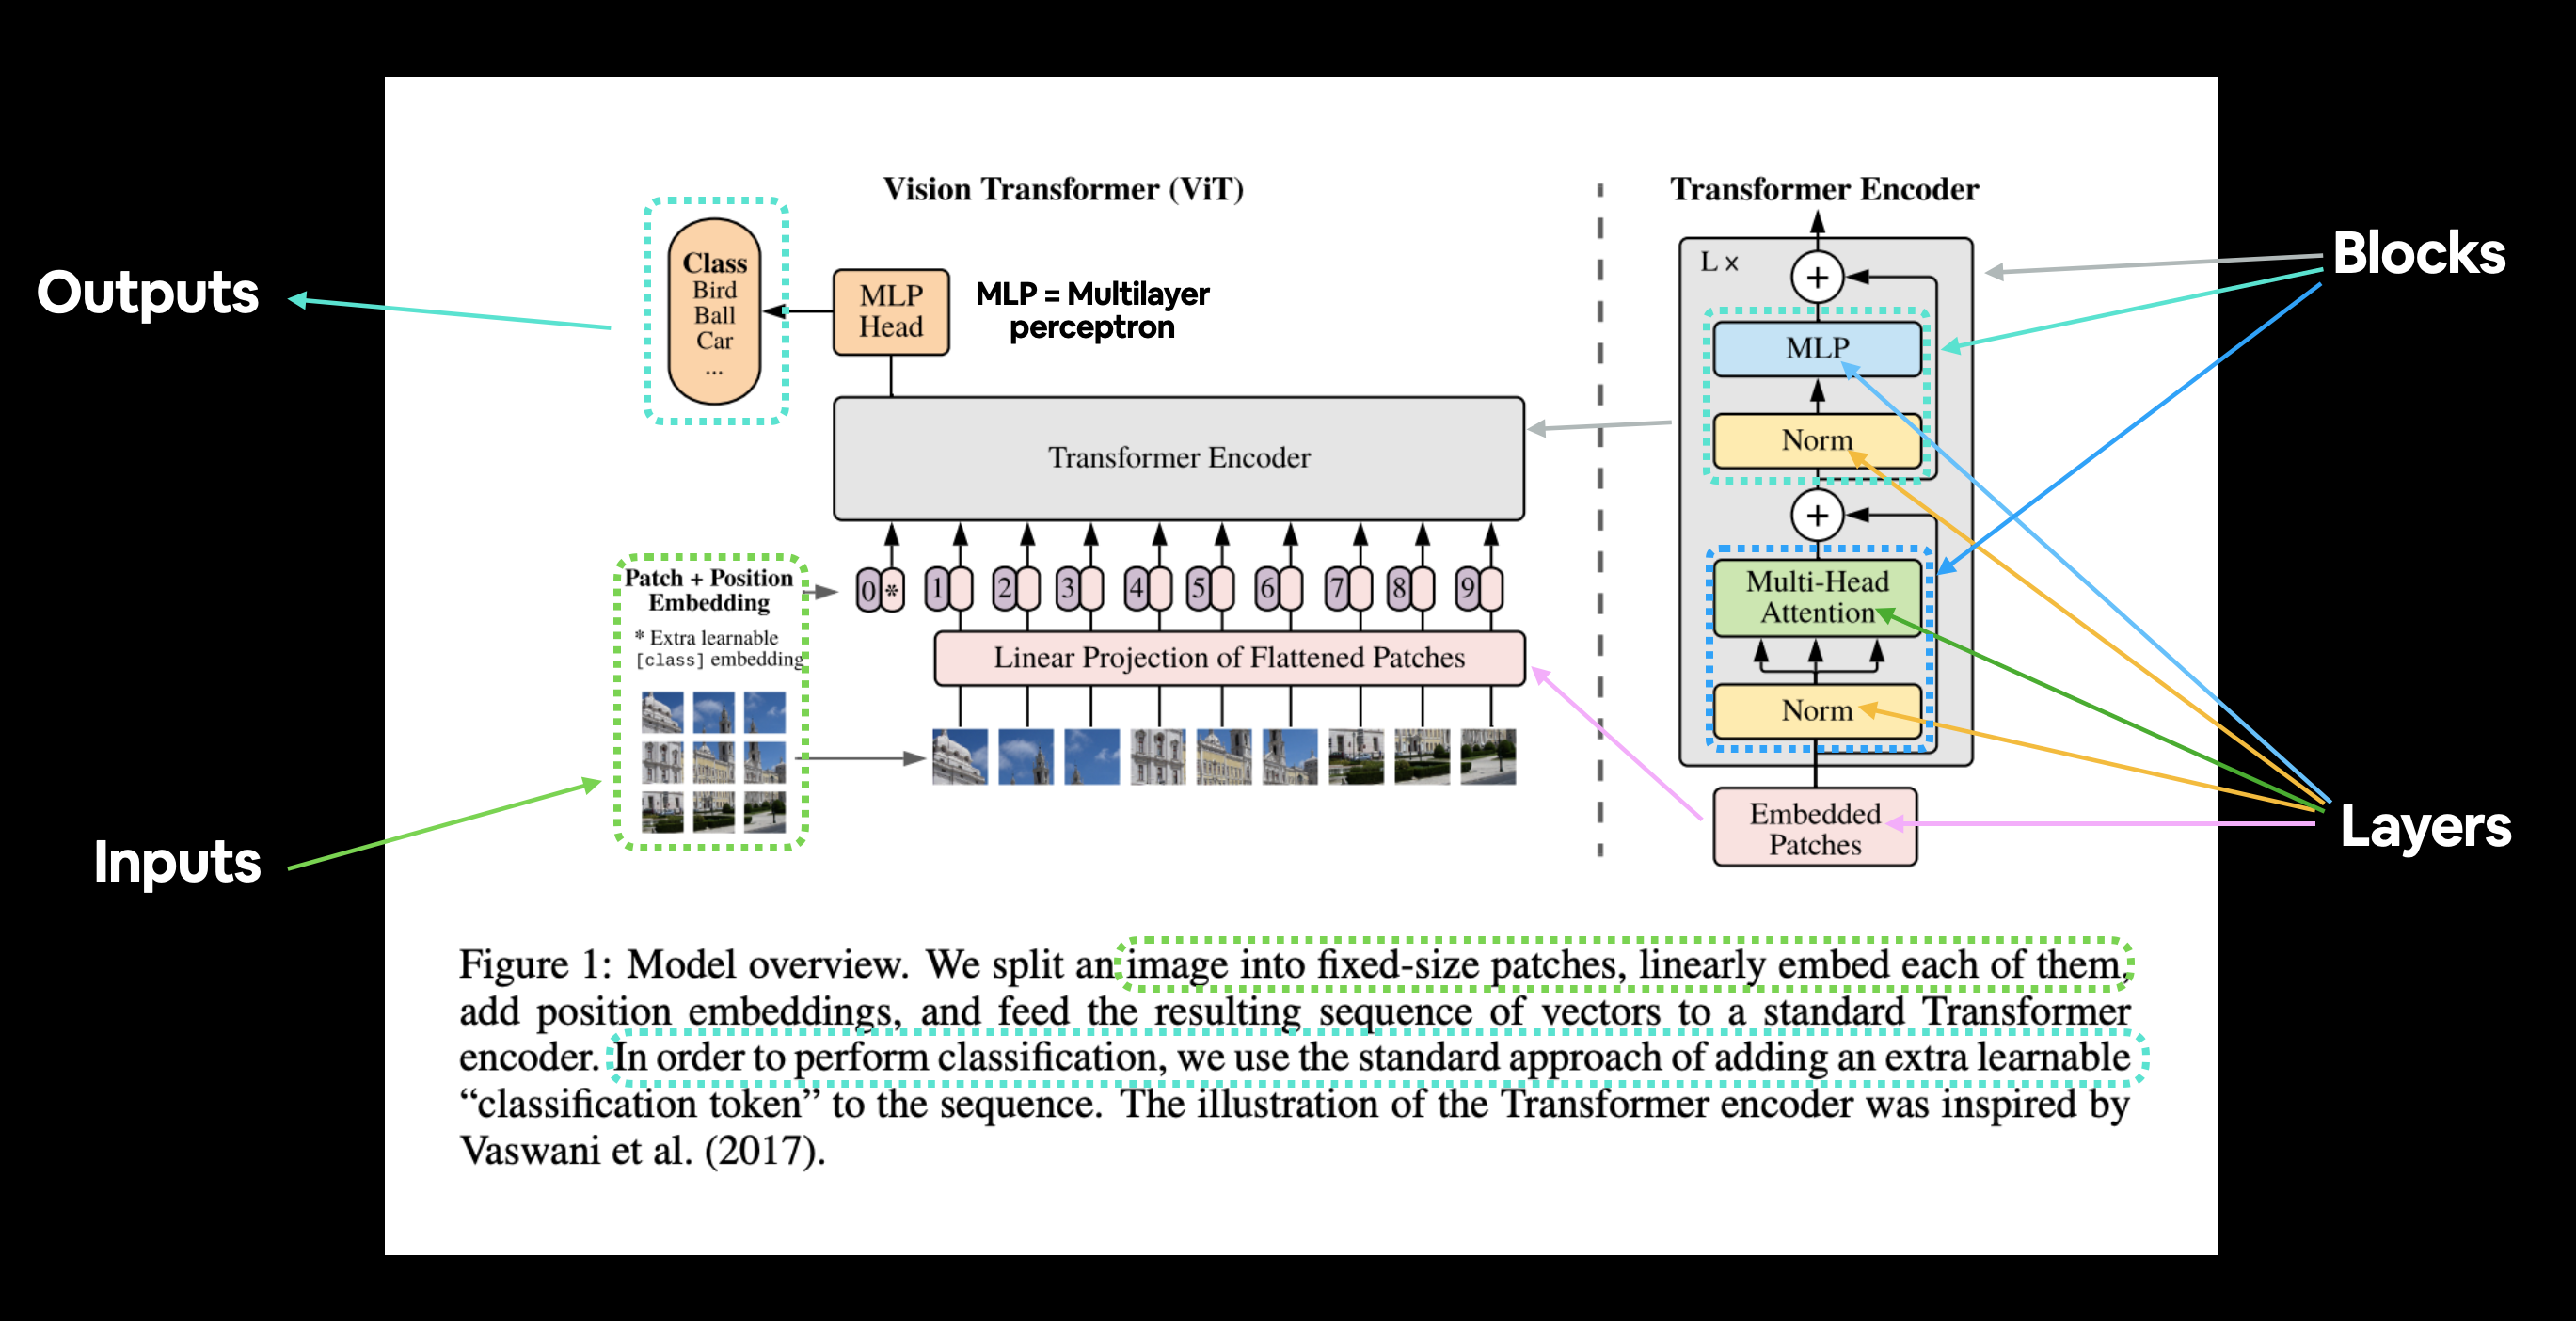

In [8]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs.png

IPython.display.Image("08-vit-paper-figure-1-inputs-and-outputs.png")


--2023-12-03 02:06:47--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51939 (51K) [image/png]
Saving to: ‘08-vit-paper-four-equations.png’

08-vit-paper-four-e 100%[===================>]  50.72K  --.-KB/s    in 0.008s  

2023-12-03 02:06:48 (5.89 MB/s) - ‘08-vit-paper-four-equations.png’ saved [51939/51939]



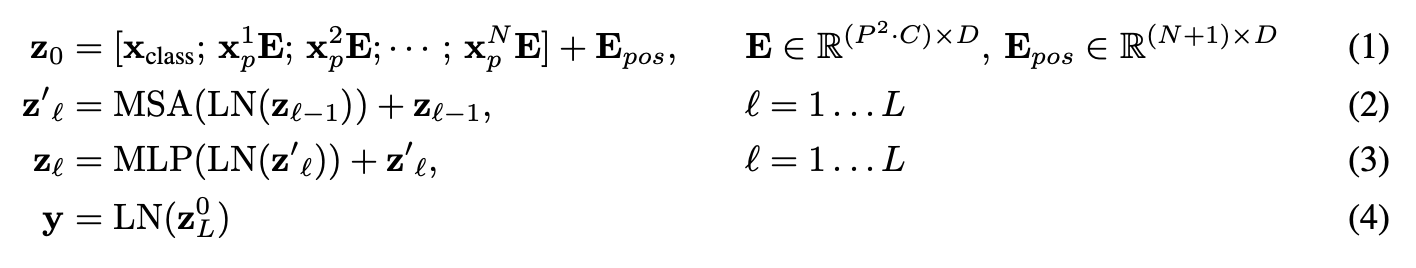

In [9]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png

IPython.display.Image("08-vit-paper-four-equations.png")

# 3. 1 VIT overview:

1. Figure 1: visual overview of the architecture
2. 4 equations: which define the funcitons of each input/label
3. Table 1: different hyperparameters for the architecture/training.
4. Text


```python

# img = 224 x 224
p = 16 # patch size
patches = []
image_0 = image[0]
for i in range(0, 224, p):
    for j in range(0, 224, p):
        if i < (224-p) and j < (224 -p):
            patch = image_0[i:i+p, j:j+p]

        patches.append(patch)

patches = torch.stack(patches)
patches.shape

```


## 4. Equation 1: Split data into patches and creating the class, position and patch embedding.

Layers = input -> Function -> output

What's the input shape? What's the output shape?

...The Transformer uses constant latent vector size  
D
  through all of its layers, so we flatten the patches and map to  
D
  dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the patch embeddings... Position embeddings are added to the patch embeddings to retain positional information. We use standard learnable 1D position embeddings...

 * Input shape: $H\times{W}\times{C}$
 * Output shape: $N\times{P^2}$
 * H - Height
 * W - Width
 * N - Number of patches = $H \times{W}\div{P^2}$
 * P - patch size
 * D - constant latent vector size (see **Table 1**)

In [80]:
# create example

height = 224
width  = 224
color_channels = 3
patch_size = 16
number_of_patches = (height * width) // (patch_size ** 2)

embedding_layer_input_shape = (height, width, color_channels)
embedding_layer_output_shape = (number_of_patches, patch_size**2* color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 1D sequence of patches): {embedding_layer_output_shape} -> number_of_patches, embedding_size")

Input shape (single 2D image): (224, 224, 3)

Output shape (single 1D sequence of patches): (196, 768) -> number_of_patches, embedding_size

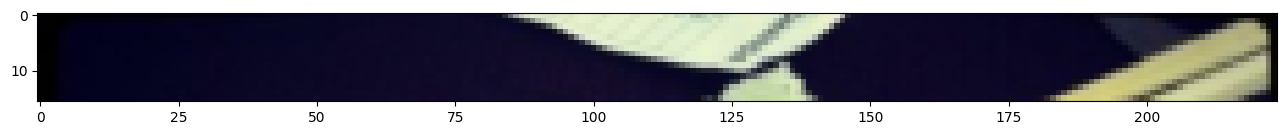

In [99]:
# get the top row of the image
image_permuted = image.permute(1,2,0) # (H, W, C)
patch_size = 16

plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :])

Number of patches per row = 14

Patch size: 16 pixels x 16 pixels.

Text(0.5, 0.98, 'sushi')

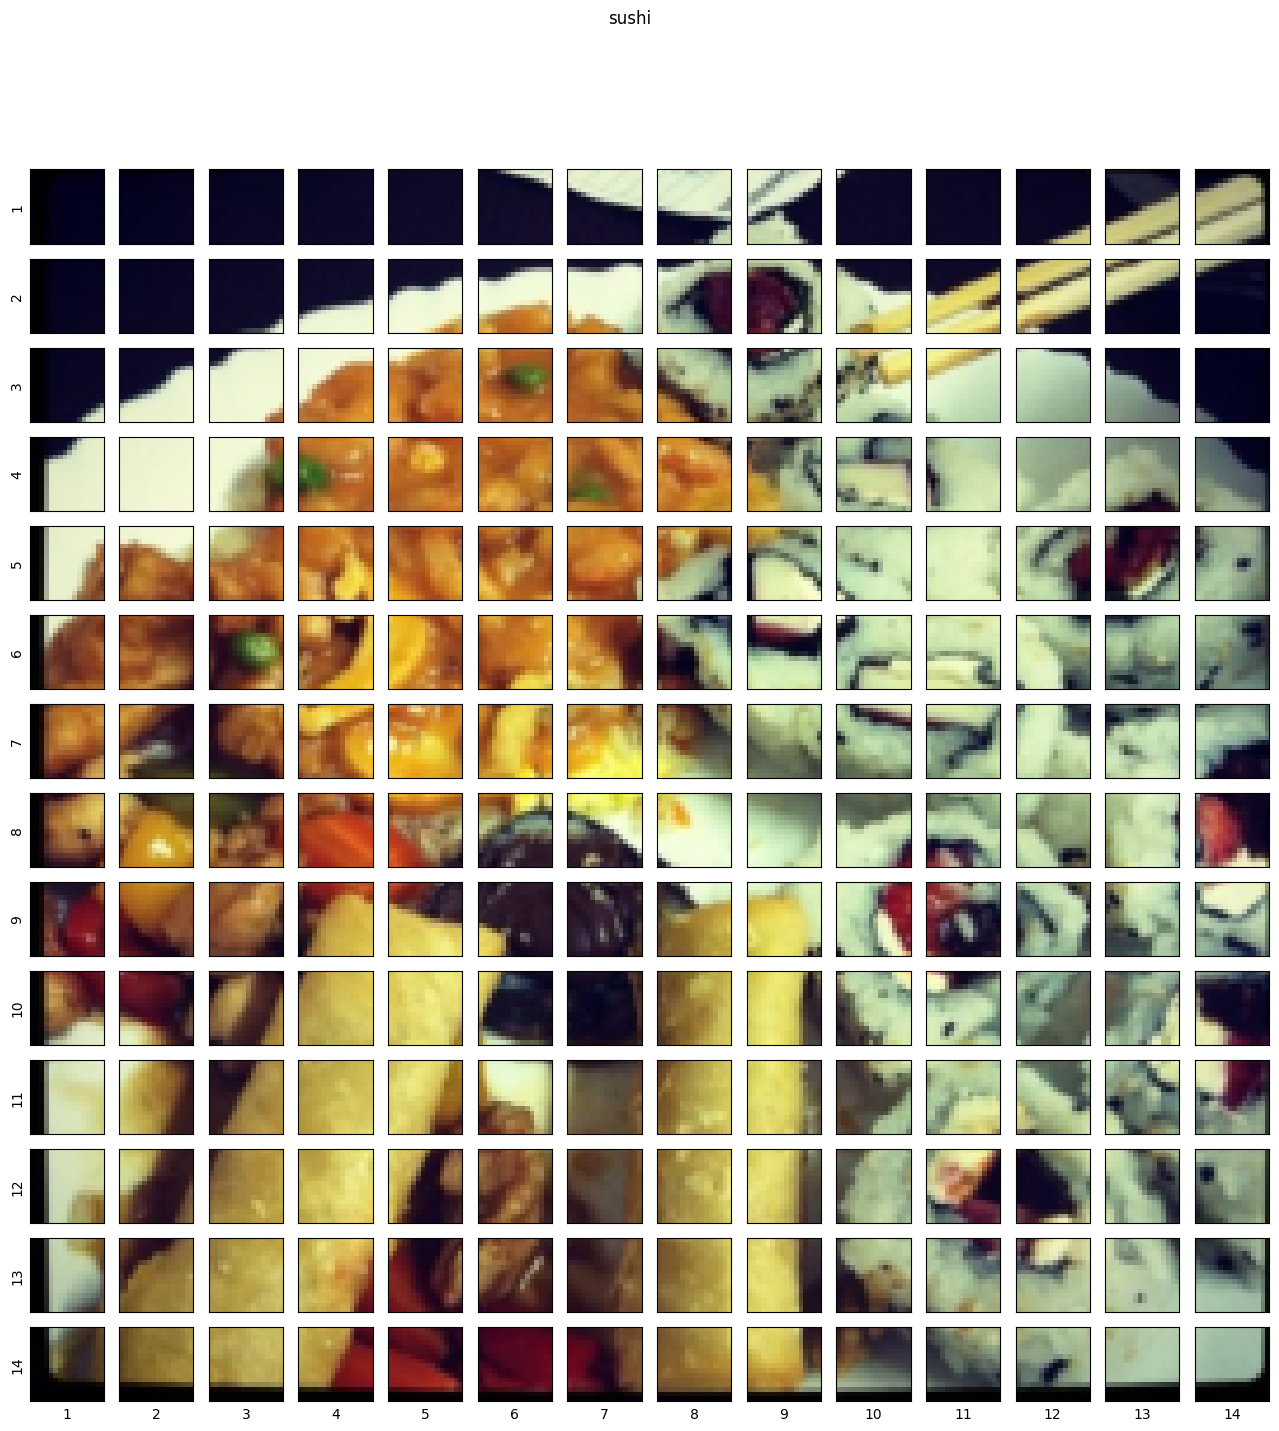

In [109]:
# set up code to plot top row as patches
img_size = 224
patch_size = 16
num_patches = img_size//patch_size

assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row = {num_patches}")
print(f"Patch size: {patch_size} pixels x {patch_size} pixels.")

fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                        sharex = True,
                        sharey=True,
                        figsize=(patch_size, patch_size))






# iterate through number of patches in the top row
for i, patch_x in enumerate(range(0, img_size, patch_size)):
    for j, patch_y in enumerate(range(0, img_size, patch_size)):
        axs[i, j].imshow(image_permuted[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size, :])
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_ylabel(i+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

fig.suptitle(f"{label}")

### 4.3 Creating image patches and turning them into patch embeddings

* Create the image patches and the image patch embeddings in a single step using `torch.nn.Conv2D` and setting the `kernel_size` and `stride` into `patch_size`.

* Then flatten the convoluted image with `torch.nn.Flatten`

In [117]:
nn.Conv2d(in_channels=3,
            out_channels=768,
            kernel_size=patch_size,
            stride=patch_size,
            padding=0)

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [122]:
convoluted_image = nn.Conv2d(in_channels=3,
            out_channels=768,
            kernel_size=patch_size,
            stride=patch_size,
            padding=0)(image.unsqueeze(0)) # add batch size

convoluted_image.shape

torch.Size([1, 768, 14, 14])

Showing random convolutional features maps from indexes: [750, 556, 749]

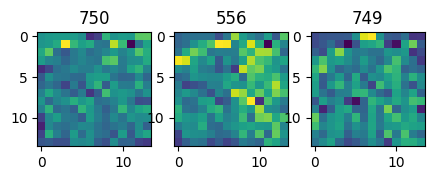

In [178]:
# plot random convolutional feature maps (embeddings)
import random
random_indexs = random.sample(range(0, 758), k=3)

print(f"Showing random convolutional features maps from indexes: {random_indexs}")

# create plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5, 15))
for i, idx in enumerate(random_indexs):
    # squeeze, detach from grad tracking
    tmp = convoluted_image.squeeze().detach().numpy()[idx]
    axs[i].imshow(tmp)
    axs[i].set_title(idx)


In [172]:
# Get a single feature map in tensor form
single_feature_map = convoluted_image[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad


(
    tensor([[[-0.0152,  0.0024, -0.0027, -0.0082, -0.0100,  0.1010,  0.0438,
           0.1808, -0.1295, -0.0635, -0.0122, -0.0579, -0.2823,  0.0335],
         [-0.0190, -0.0054, -0.0665, -0.3409, -0.2202,  0.1152, -0.1127,
           0.0370, -0.0808, -0.0700, -0.3337,  0.0334,  0.1808, -0.0946],
         [-0.0859, -0.2537,  0.0264, -0.0592, -0.2532, -0.1794, -0.1809,
          -0.0953,  0.2081, -0.1941, -0.1847, -0.2093, -0.1135, -0.0281],
         [-0.0194, -0.1684, -0.0420, -0.0471, -0.1566, -0.1976, -0.0500,
          -0.2230, -0.1879, -0.1411, -0.1152, -0.1315, -0.0048, -0.2112],
         [-0.0546, -0.1493, -0.1144, -0.1424, -0.0685, -0.2046, -0.0958,
          -0.2307, -0.2626, -0.1565, -0.1378, -0.2138, -0.2981, -0.1557],
         [-0.1396, -0.1981,  0.0693, -0.1739, -0.3657, -0.1519, -0.3595,
          -0.0380, -0.3087, -0.1685, -0.1646, -0.2078,  0.1711, -0.1403],
         [-0.0460, -0.2450,  0.0812, -0.0582, -0.2108, -0.1413, -0.2462,
          -0.2778, -0.0495,  0.0327, -

### 4.4 Flattening the patch with `nn.Flatten`

In [191]:
flattened_image = nn.Flatten(2,3)(convoluted_image).permute(0,2,1)
flattened_image.shape

torch.Size([1, 196, 768])

Original image shape: torch.Size([3, 224, 224])

Image feature map shape: torch.Size([1, 768, 14, 14])

Flattened image feature map shape: torch.Size([1, 196, 768])

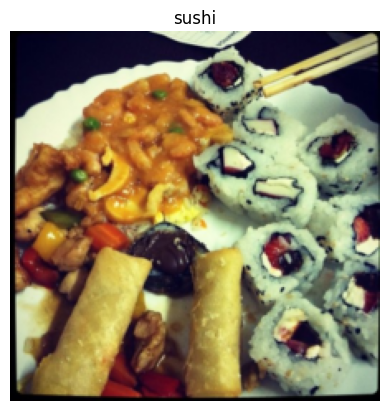

In [195]:
# 1. View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(label)
plt.axis(False);
print(f"Original image shape: {image.shape}")

# 2. Turn image into feature maps
conv2d = nn.Conv2d(in_channels=3,
            out_channels=768,
            kernel_size=patch_size,
            stride=patch_size,
            padding=0)
convoluted_image = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape: {convoluted_image.shape}")

# 3. Flatten the feature maps & permute to get the right order
flatten = nn.Flatten(2,3)
flattened_image = flatten(convoluted_image).permute(0,2,1)
print(f"Flattened image feature map shape: {flattened_image.shape}")

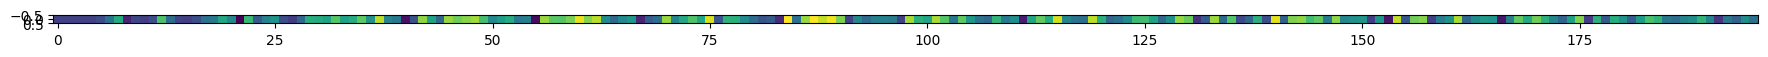

In [218]:
plt.figure(figsize=(22, 22))
plt.imshow(flattened_image[:, :, 0].detach().numpy())

### 4.5 Turning the VIT patch embedding layer into a PyTorch module

We want this module to do a few things:
1. Create a class called `PatchEmbedding`
2. Initialize with appropriate hyper parameters such as channels, embedding dimension and patch size.
3. Create a layer to turn an image into embedded patches using `nn.Conv2d`
4. Create a layer to flatten the feature maps of the output of step 3
5. Define a `forward()` method that defines the forward computation i.e. pass through layers 3 to 4
6. Make sure the output shape of the layer reflects the required output shape of the patch embedding.

In [271]:
class PatchEmbedding(nn.Module):
    def __init__(self,
                 channels: int =3,
                 embedding_dim: int =768,
                 patch_size: int =16):
        super().__init__()
        # conv layer
        self.patcher = nn.Conv2d(in_channels=channels,
                  out_channels=embedding_dim,
                  kernel_size=patch_size,
                  stride=patch_size,
                  padding=0)
        # flatten layer
        self.flatten = nn.Flatten(2,3)
    def forward(self, x):
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"
        x = self.patcher(x)
        x = self.flatten(x)
        x = x.permute(0,2,1)
        return x


In [269]:
summary(tmp, input_size = (1, 3, 224, 224))


Layer (type:depth-idx)                   Output Shape              Param #
PatchEmbedding                           [1, 196, 768]             --
├─Conv2d: 1-1                            [1, 768, 14, 14]          590,592
├─Flatten: 1-2                           [1, 768, 196]             --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

In [270]:
set_seeds()
# create an instance of patch embedding layer
patchify = PatchEmbedding()
print(f"Pass a single image through the embedding layer")
print(f"Input image size: {image.unsqueeze(0).shape}") # batchify first
patch_embedded_image = patchify(image.unsqueeze(0))

print(f"Output image size: {patch_embedded_image.shape}") # batchify first

Pass a single image through the embedding layer

Input image size: torch.Size([1, 3, 224, 224])

Output image size: torch.Size([1, 196, 768])

In [273]:
patchify.state_dict().keys()

odict_keys(['patcher.weight', 'patcher.bias'])

## Creating the class token embedding
To prepend a learnable class token to the start of the patch embedding

* Using `nn.Parameter` to create a learnable parameter.